In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [9]:
images_path = 'selfdriven'
labels_train = pd.read_csv('labels_train.csv')
labels_trainval = pd.read_csv('labels_trainval.csv')
labels_val = pd.read_csv('labels_val.csv')

In [10]:
labels_train.head

<bound method NDFrame.head of                           frame  xmin  xmax  ymin  ymax  class_id
0       1478019952686311006.jpg   237   251   143   155         1
1       1478019952686311006.jpg   437   454   120   186         3
2       1478019953180167674.jpg   218   231   146   158         1
3       1478019953689774621.jpg   171   182   141   154         2
4       1478019953689774621.jpg   179   191   144   155         1
...                         ...   ...   ...   ...   ...       ...
132401  1479506176491553178.jpg   166   186   139   156         1
132402  1479506176491553178.jpg   182   204   142   153         1
132403  1479506176491553178.jpg   239   261   139   155         1
132404  1479506176491553178.jpg   259   280   139   157         1
132405  1479506176491553178.jpg   284   324   137   168         1

[132406 rows x 6 columns]>

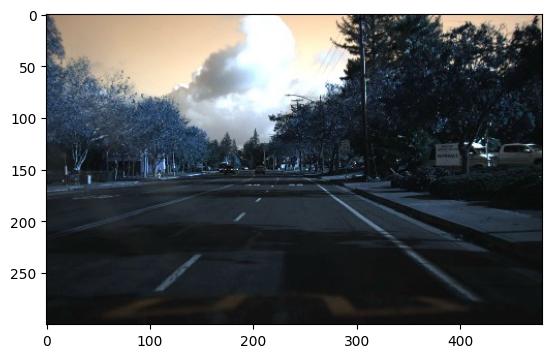

In [11]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('selfdriven/1478019954186238236.jpg')
plt.imshow(img)
plt.show()

In [12]:
!pip install ultralytics

In [13]:
from ultralytics import YOLO

# Build a YOLOv9c model from scratch
model = YOLO("yolov9c.yaml")

# Build a YOLOv9c model from pretrained weight
model = YOLO("yolov9c.pt")

# Display model information (optional)
model.info()


YOLOv9c summary: 618 layers, 25,590,912 parameters, 0 gradients, 104.0 GFLOPs


(618, 25590912, 0, 104.02268160000003)

In [14]:
classes_id = [0, 1, 2, 7,9]
# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="coco8.yaml",epochs=20,imgsz=640,classes=classes_id)

# Run inference with the YOLOv9c model on the 'bus.jpg' image
results = model("selfdriven/1478019954186238236.jpg")

New https://pypi.org/project/ultralytics/8.2.92 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.82  Python-3.12.4 torch-2.4.1+cpu CPU (Intel Core(TM) i5-6200U 2.30GHz)
engine\trainer: task=detect, mode=train, model=yolov9c.pt, data=coco8.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=[0, 1, 2, 7, 9], retina_masks=False, embed=None, show=False, save_

train: Scanning C:\Users\JAVED IQBAL\Desktop\self_drive\datasets\coco8\labels\train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
val: Scanning C:\Users\JAVED IQBAL\Desktop\self_drive\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs\detect\train10\labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train10
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G          0      65.27          0          0        640: 100%|██████████| 1/1 [00:55<00:00, 55.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.04s/it]

                   all          4         10       0.83        0.8      0.859      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G          0      90.67          0          0        640: 100%|██████████| 1/1 [01:01<00:00, 61.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.77s/it]

                   all          4         10      0.801      0.807      0.859      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G          0      66.73          0          0        640: 100%|██████████| 1/1 [00:53<00:00, 53.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.89s/it]

                   all          4         10      0.809      0.848      0.871      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G          0      105.5          0          0        640: 100%|██████████| 1/1 [00:51<00:00, 51.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.18s/it]

                   all          4         10      0.797        0.9      0.851      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G          0       59.5          0          0        640: 100%|██████████| 1/1 [00:45<00:00, 45.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.54s/it]

                   all          4         10      0.794        0.9      0.846      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G          0      39.91          0          0        640: 100%|██████████| 1/1 [00:45<00:00, 45.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.27s/it]

                   all          4         10      0.791        0.9      0.846       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G          0       60.7          0          0        640: 100%|██████████| 1/1 [00:44<00:00, 44.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.79s/it]

                   all          4         10      0.792        0.9      0.846      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G          0      30.52          0          0        640: 100%|██████████| 1/1 [00:49<00:00, 49.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.87s/it]

                   all          4         10      0.795        0.9      0.851      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G          0       35.7          0          0        640: 100%|██████████| 1/1 [00:44<00:00, 44.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.71s/it]

                   all          4         10      0.797        0.9       0.87      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G          0      25.52          0          0        640: 100%|██████████| 1/1 [00:51<00:00, 51.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.33s/it]

                   all          4         10       0.81        0.9      0.891       0.46


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G          0      11.34          0          0        640: 100%|██████████| 1/1 [00:49<00:00, 49.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.95s/it]

                   all          4         10      0.823        0.9      0.901      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G          0      9.702          0          0        640: 100%|██████████| 1/1 [00:47<00:00, 47.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.27s/it]

                   all          4         10      0.846        0.9      0.901      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G          0       12.4          0          0        640: 100%|██████████| 1/1 [00:42<00:00, 42.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.93s/it]

                   all          4         10      0.878        0.9      0.901      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G          0      7.022          0          0        640: 100%|██████████| 1/1 [00:44<00:00, 44.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.03s/it]

                   all          4         10      0.899        0.9      0.901      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G          0      5.816          0          0        640: 100%|██████████| 1/1 [00:46<00:00, 46.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.65s/it]

                   all          4         10      0.905        0.9      0.901      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G          0      5.127          0          0        640: 100%|██████████| 1/1 [00:50<00:00, 50.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.45s/it]

                   all          4         10      0.914        0.9      0.901      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G          0      6.734          0          0        640: 100%|██████████| 1/1 [00:42<00:00, 42.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.32s/it]

                   all          4         10      0.896        0.9      0.901      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G          0      2.843          0          0        640: 100%|██████████| 1/1 [00:50<00:00, 50.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.38s/it]

                   all          4         10      0.896        0.9      0.901      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G          0      7.098          0          0        640: 100%|██████████| 1/1 [00:45<00:00, 45.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.85s/it]

                   all          4         10      0.885        0.9      0.901      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G          0      2.787          0          0        640: 100%|██████████| 1/1 [00:47<00:00, 47.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.65s/it]

                   all          4         10      0.885        0.9      0.901      0.485



20 epochs completed in 0.412 hours.
Optimizer stripped from runs\detect\train10\weights\last.pt, 51.7MB
Optimizer stripped from runs\detect\train10\weights\best.pt, 51.7MB

Validating runs\detect\train10\weights\best.pt...
Ultralytics YOLOv8.2.82  Python-3.12.4 torch-2.4.1+cpu CPU (Intel Core(TM) i5-6200U 2.30GHz)
YOLOv9c summary (fused): 384 layers, 25,380,928 parameters, 0 gradients, 102.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.68s/it]


                   all          4         10      0.885        0.9      0.901      0.485
                person          3         10      0.885        0.9      0.901      0.485
Speed: 10.4ms preprocess, 2883.1ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs\detect\train10

image 1/1 c:\Users\JAVED IQBAL\Desktop\self_drive\selfdriven\1478019954186238236.jpg: 416x640 3 cars, 1 truck, 1960.4ms
Speed: 8.5ms preprocess, 1960.4ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


In [15]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 7.])
conf: tensor([0.4363, 0.3999, 0.3709, 0.2551])
data: tensor([[2.0197e+02, 1.4541e+02, 2.1301e+02, 1.5416e+02, 4.3633e-01, 2.0000e+00],
        [4.2675e+02, 1.2523e+02, 4.7971e+02, 1.5061e+02, 3.9988e-01, 2.0000e+00],
        [1.6652e+02, 1.4453e+02, 1.8304e+02, 1.5441e+02, 3.7087e-01, 2.0000e+00],
        [4.2634e+02, 1.2517e+02, 4.7967e+02, 1.5048e+02, 2.5506e-01, 7.0000e+00]])
id: None
is_track: False
orig_shape: (300, 480)
shape: torch.Size([4, 6])
xywh: tensor([[207.4925, 149.7845,  11.0388,   8.7425],
        [453.2337, 137.9204,  52.9604,  25.3872],
        [174.7832, 149.4695,  16.5209,   9.8715],
        [453.0041, 137.8233,  53.3360,  25.3076]])
xywhn: tensor([[0.4323, 0.4993, 0.0230, 0.0291],
        [0.9442, 0.4597, 0.1103, 0.0846],
        [0.3641, 0.4982, 0.0344, 0.0329],
        [0.9438, 0.4594, 0.1111, 0.0844]])
xyxy: tensor([[201.9731, 145.4133, 213.0119, 154.1558],
        [426.7535

In [16]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen

In [17]:
path = r'C:\Users\JAVED IQBAL\Desktop\self_drive\selfdriven\images\1478019957687018435.jpg'


In [18]:
# Example usage with an object 'result'
print(dir(result))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_keys', 'boxes', 'cpu', 'cuda', 'keypoints', 'masks', 'names', 'new', 'numpy', 'obb', 'orig_img', 'orig_shape', 'path', 'plot', 'probs', 'save', 'save_crop', 'save_dir', 'save_txt', 'show', 'speed', 'summary', 'to', 'tojson', 'update', 'verbose']


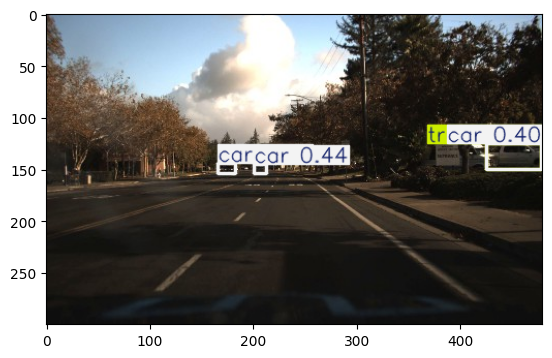

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

for r in results:
#      plt.imshow(r)
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
#     im.show()  # show image
    plt.imshow(im)
    plt.show()

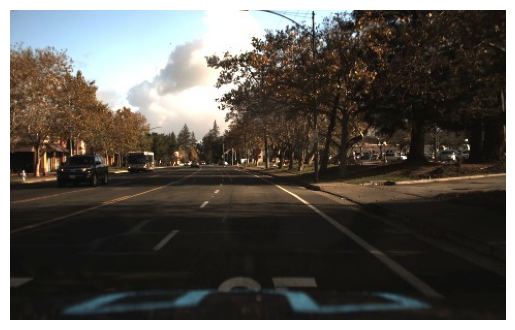

In [20]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
image_Try = cv2.imread('selfdriven/1478019957687018435.jpg')

# Convert the image from BGR to RGB (OpenCV uses BGR by default)
image_Try = cv2.cvtColor(image_Try, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_Try)
plt.axis('off')  # Hide axes
plt.show()


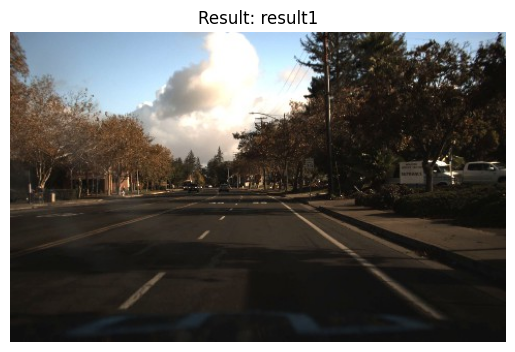

An error occurred: [Errno 2] No such file or directory: 'selfdriven/images/1478019957687018435.jpg'


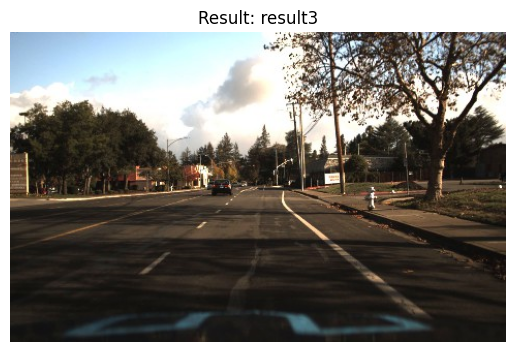

In [21]:
import cv2
import matplotlib.pyplot as plt

# Example lists - replace these with your actual data
image_paths = [
    'selfdriven/1478019954186238236.jpg',
    'selfdriven/images/1478019957687018435.jpg',
    'selfdriven/1478019966688931929.jpg'
]

# Simulated results from a model
# Replace this with actual results from your model
results = [
    {'path': 'selfdriven/1478019954186238236.jpg', 'data': 'result1'},
    {'path': 'selfdriven/images/1478019957687018435.jpg', 'data': 'result2'},
    {'path': 'selfdriven/1478019966688931929.jpg', 'data': 'result3'}
]

# Check if lengths match
if len(results) != len(image_paths):
    print("Warning: Number of results does not match number of images.")
    min_length = min(len(results), len(image_paths))
else:
    min_length = len(results)

# Loop through each result in the results list
for idx in range(min_length):
    try:
        result = results[idx]  # Get the result for the current image
        image_path = image_paths[idx]
        
        # Load the image using OpenCV
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Image not found at path: {image_path}")
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        # Display the image using Matplotlib
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.title(f"Result: {result['data']}")  # Show result data as title
        plt.show()

    except IndexError:
        print(f"IndexError: Tried to access index {idx} which is out of range.")
    except Exception as e:
        print(f"An error occurred: {e}")


In [22]:

from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n-seg.pt")  # load an official model
# model = YOLO("path/to/best.pt")  # load a custom model

# Predict with the model
results = model("selfdriven/1478019955679801306.jpg") 


image 1/1 c:\Users\JAVED IQBAL\Desktop\self_drive\selfdriven\1478019955679801306.jpg: 416x640 1 truck, 353.2ms
Speed: 19.8ms preprocess, 353.2ms inference, 10.3ms postprocess per image at shape (1, 3, 416, 640)


In [23]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

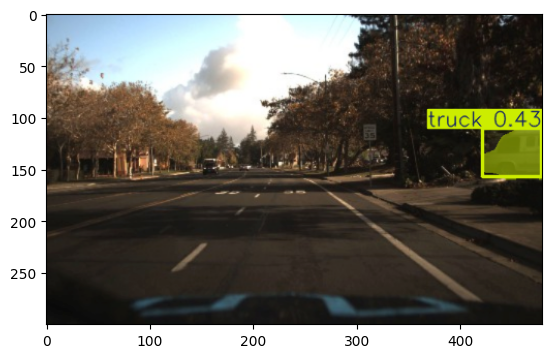

In [24]:
import matplotlib.pyplot as plt
from PIL import Image

for r in results:
#      plt.imshow(r)
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
#     im.show()  # show image
    plt.imshow(im)
    plt.show()

In [26]:


import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming the predictions and true labels are stored in lists y_pred and y_true
# Replace these lists with actual predictions and labels from your task.
# Example placeholder values for true and predicted labels
# For object detection, these might be a list of detected objects

y_true = [1, 0, 1, 1, 0, 1]  # Replace with actual labels for your task
y_pred = [1, 0, 1, 0, 0, 1]  # Replace with predicted labels from your model

# Calculate error metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Output the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Precision: 0.8888888888888888
Recall: 0.8333333333333334
F1 Score: 0.8380952380952381


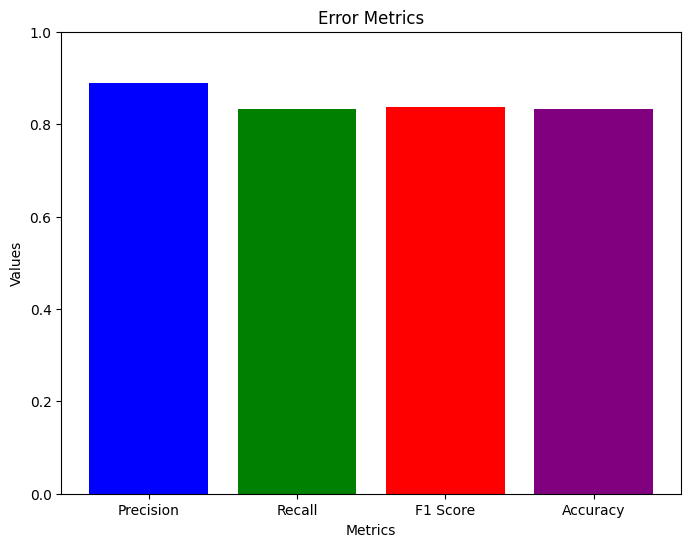

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Example values for true labels (y_true) and predicted labels (y_pred)
y_true = [1, 0, 1, 1, 0, 1]  # Replace with actual labels
y_pred = [1, 0, 1, 0, 0, 1]  # Replace with predicted labels

# Calculate error metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

# Create a dictionary to hold the metrics
metrics = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Accuracy': accuracy
}

# Plotting the error metrics
metrics_names = list(metrics.keys())
metrics_values = list(metrics.values())

plt.figure(figsize=(8, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Error Metrics')
plt.ylim(0, 1)  # As these metrics are usually between 0 and 1
plt.show()




In [33]:
import os
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Example values for true labels (y_true) and predicted labels (y_pred)
y_true = [1, 0, 1, 1, 0, 1]  # Replace with actual labels
y_pred = [1, 0, 1, 0, 0, 1]  # Replace with predicted labels

# Calculate the metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Value': [precision, recall, f1, accuracy]
})

# Define the directory path where you want to save the CSV
directory = 'C:/your_path/selfdrive'  # Replace 'your_path' with the actual path on your machine

# Check if the directory exists, if not, create it
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the CSV file path
csv_path = os.path.join(directory, 'metrics.csv')

# Save the metrics to a CSV file
metrics_df.to_csv(csv_path, index=False)

print(f'Metrics saved to {csv_path}')






Metrics saved to C:/your_path/selfdrive\metrics.csv


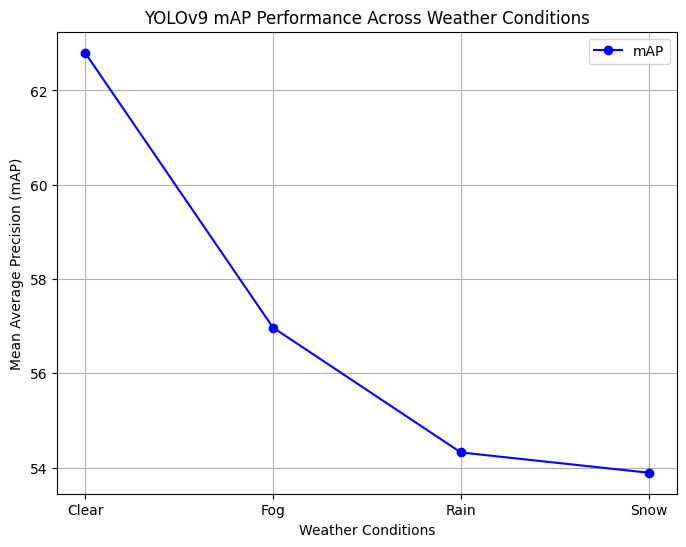

In [1]:
import matplotlib.pyplot as plt

# Data points
weather_conditions = ['Clear', 'Fog', 'Rain', 'Snow']
map_scores = [62.80, 56.97, 54.32, 53.89]

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(weather_conditions, map_scores, marker='o', linestyle='-', color='b', label='mAP')

# Add titles and labels
plt.title('YOLOv9 mAP Performance Across Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Mean Average Precision (mAP)')
plt.grid(True)
plt.legend()

# Show the graph
plt.show()


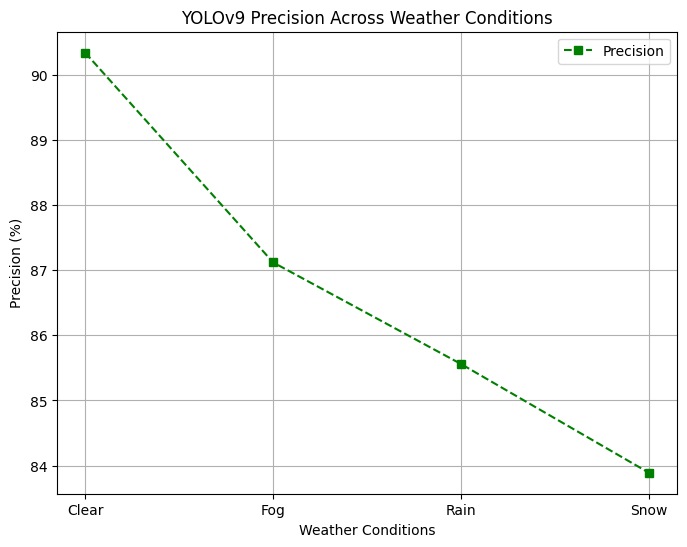

In [2]:
import matplotlib.pyplot as plt

# Weather conditions
weather_conditions = ['Clear', 'Fog', 'Rain', 'Snow']

# Precision scores for each condition
precision_scores = [90.34, 87.12, 85.56, 83.89]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(weather_conditions, precision_scores, marker='s', linestyle='--', color='g', label='Precision')

# Add titles and labels
plt.title('YOLOv9 Precision Across Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Precision (%)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


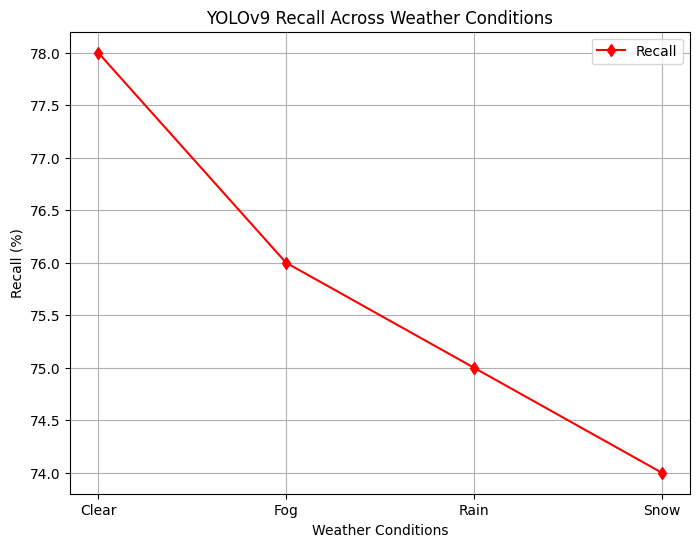

In [3]:
import matplotlib.pyplot as plt

# Recall scores for each condition
recall_scores = [78.00, 76.00, 75.00, 74.00]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(weather_conditions, recall_scores, marker='d', linestyle='-', color='r', label='Recall')

# Add titles and labels
plt.title('YOLOv9 Recall Across Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Recall (%)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [4]:
# Precision and Recall values
precision = 90.34
recall = 78.00

# Convert to proportions
precision_proportion = precision / 100
recall_proportion = recall / 100

# Calculate accuracy
accuracy = (2 * (precision_proportion * recall_proportion)) / (precision_proportion + recall_proportion)

# Convert back to percentage
accuracy_percentage = accuracy * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")


Accuracy: 83.72%
